In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dataset = utils.import_train(100_000)

In [3]:
train_dataset

ModelNet10(3991)

In [4]:
point_cloud = train_dataset[1]  # 1000 = chair

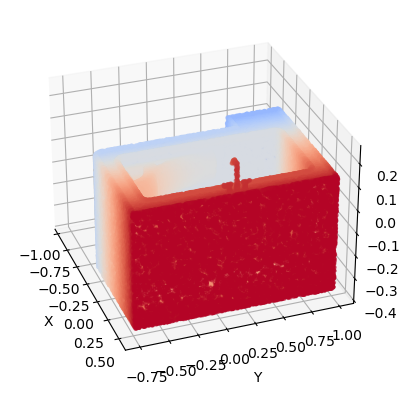

In [5]:
utils.draw_pointcloud(point_cloud)

In [6]:
def sphereFit(spX,spY,spZ):
    #   Assemble the A matrix
    spX = np.array(spX)
    spY = np.array(spY)
    spZ = np.array(spZ)
    A = np.zeros((len(spX),4))
    A[:,0] = spX*2
    A[:,1] = spY*2
    A[:,2] = spZ*2
    A[:,3] = 1

    #   Assemble the f matrix
    f = np.zeros((len(spX),1))
    f[:,0] = (spX*spX) + (spY*spY) + (spZ*spZ)
    C, residules, rank, singval = np.linalg.lstsq(A,f)

    #   solve for the radius
    t = (C[0]*C[0])+(C[1]*C[1])+(C[2]*C[2])+C[3]
    radius = np.sqrt(t)

    return radius, C[0], C[1], C[2]

In [7]:
point0 = point_cloud.pos[1]
nr_points = len(point_cloud.pos)
radius = .1
neighbours0 = utils.find_neighborhood(point_cloud.pos, point0, radius)

In [8]:
neighbours0

tensor([[ 0.2417, -0.5972, -0.0532],
        [ 0.3098, -0.5972, -0.0531],
        [ 0.3032, -0.5972, -0.1147],
        ...,
        [ 0.2430, -0.5972,  0.0332],
        [ 0.2457, -0.5972, -0.0326],
        [ 0.2810, -0.5972,  0.0310]])